# Recalculate Zircon
- probability
- mean value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the zirkon data

In [2]:
dataPath = './data/'
df = pd.read_csv(dataPath + '4.5Ga_zircon_d18O.csv')
#df = pd.read_csv(dataPath + '4.5Ga_zircon_Hf.csv')
df_filt = pd.read_csv(dataPath + 'filtered_data2.csv')

In [3]:
df_filt["ZIR_Interpolated_mean_d18O"]

0       0.578372
1       0.577745
2       0.577119
3       0.576492
4       0.575865
          ...   
5036    0.679913
5037    0.677905
5038    0.675898
5039    0.673890
5040    0.671883
Name: ZIR_Interpolated_mean_d18O, Length: 5041, dtype: float64

In [19]:
# Define the window size and overlap
window_size = 5  # 5 Ma
overlap = 0.99  # 99% overlap
step_size = window_size * (1 - overlap)

# Initialize an empty list to store the results
relative_counts = []
mean_values = []
# Compute the relative counts in sliding windows
start_age = 0
end_age = 257.05
current_start = start_age

while current_start + window_size <= end_age:
    current_end = current_start + window_size
    # Count samples within the current window
    count = ((df['Age'] >= current_start) & (df['Age'] < current_end)).sum()
    average = df.loc[(df['Age'] >= current_start) & (df['Age'] < current_end), 'd18O'].mean()
    relative_counts.append({'Start': current_start, 'End': current_end, 'Count': count})
    mean_values.append({'Mean': average})
    # Move the window
    current_start += step_size

# Convert the results to a DataFrame
relative_counts_df = pd.DataFrame(relative_counts)
mean_values_df = pd.DataFrame(mean_values).fillna(method='ffill').fillna(method='bfill')
relative_counts_df = pd.concat([relative_counts_df, mean_values_df], axis=1)
relative_counts_df["Mean"] = (relative_counts_df["Mean"] - relative_counts_df["Mean"].min()) / (relative_counts_df["Mean"].max() - relative_counts_df["Mean"].min())
relative_counts_df["Count"] = (relative_counts_df["Count"] - relative_counts_df["Count"].min()) / (relative_counts_df["Count"].max() - relative_counts_df["Count"].min())
print(relative_counts_df)

       Start     End     Count      Mean
0       0.00    5.00  0.372294  0.641379
1       0.05    5.05  0.372294  0.638354
2       0.10    5.10  0.372294  0.638354
3       0.15    5.15  0.350649  0.653437
4       0.20    5.20  0.333333  0.662915
...      ...     ...       ...       ...
5036  251.80  256.80  0.017316  0.499154
5037  251.85  256.85  0.017316  0.499154
5038  251.90  256.90  0.017316  0.499154
5039  251.95  256.95  0.017316  0.499154
5040  252.00  257.00  0.017316  0.499154

[5041 rows x 4 columns]


/tmp/ipykernel_12884/3864284083.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mean_values_df = pd.DataFrame(mean_values).fillna(method='ffill').fillna(method='bfill')


# Plot the PDF

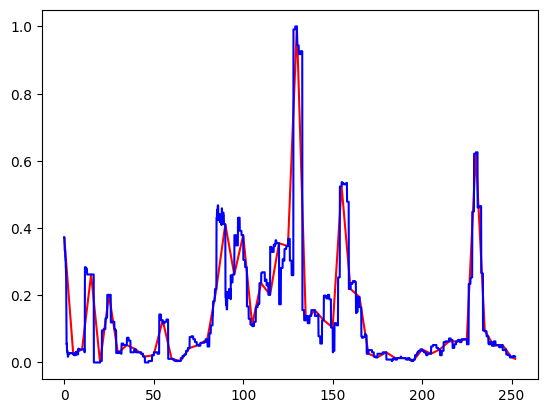

In [20]:
plt.plot(df_filt["Age"], df_filt["ZIR_Count_PDF_d18O"],color='red')
plt.plot(relative_counts_df['Start'], relative_counts_df['Count'], label='Count', color='blue')

# Plot the mean values

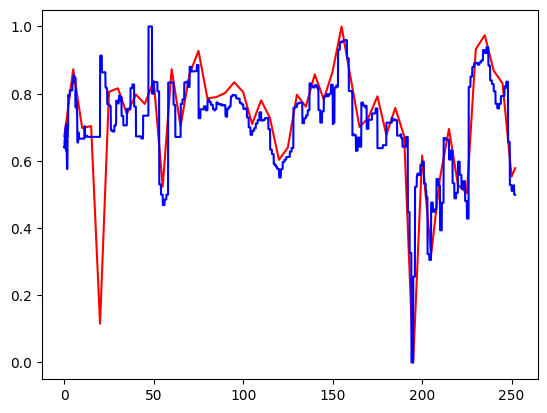

In [22]:
plt.plot(df_filt["Age"], df_filt["ZIR_Interpolated_mean_d18O"],color='red')
plt.plot(relative_counts_df['Start'], relative_counts_df["Mean"], color='blue')

In [25]:
relative_counts_df = relative_counts_df.iloc[::-1].reset_index(drop=True)
df_filt["ZIR_Count_PDF_d18O"] = relative_counts_df["Count"]
df_filt["ZIR_Interpolated_mean_d18O"] = relative_counts_df["Mean"]

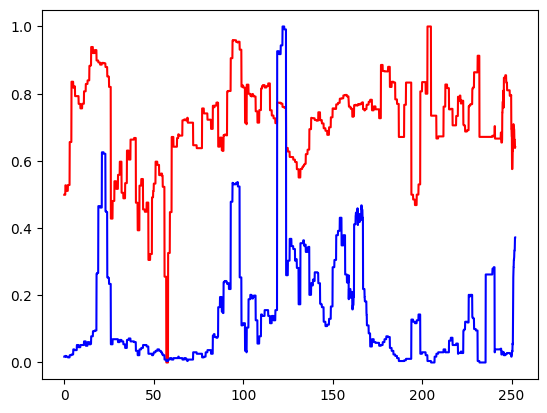

In [26]:
plt.plot(df_filt["Age"], df_filt["ZIR_Interpolated_mean_d18O"],color='red')
plt.plot(df_filt["Age"], df_filt["ZIR_Count_PDF_d18O"],color='blue')

In [27]:
dataPath = './data/'
#df = pd.read_csv(dataPath + '4.5Ga_zircon_d18O.csv')
df = pd.read_csv(dataPath + '4.5Ga_zircon_Hf.csv')

In [28]:
# Define the window size and overlap
window_size = 5  # 5 Ma
overlap = 0.99  # 99% overlap
step_size = window_size * (1 - overlap)

# Initialize an empty list to store the results
relative_counts = []
mean_values = []
# Compute the relative counts in sliding windows
start_age = 0
end_age = 257.05
current_start = start_age

while current_start + window_size <= end_age:
    current_end = current_start + window_size
    # Count samples within the current window
    count = ((df['Age'] >= current_start) & (df['Age'] < current_end)).sum()
    average = df.loc[(df['Age'] >= current_start) & (df['Age'] < current_end), 'Hf'].mean()
    relative_counts.append({'Start': current_start, 'End': current_end, 'Count': count})
    mean_values.append({'Mean': average})
    # Move the window
    current_start += step_size

# Convert the results to a DataFrame
relative_counts_df = pd.DataFrame(relative_counts)
mean_values_df = pd.DataFrame(mean_values).fillna(method='ffill').fillna(method='bfill')
relative_counts_df = pd.concat([relative_counts_df, mean_values_df], axis=1)
relative_counts_df["Mean"] = (relative_counts_df["Mean"] - relative_counts_df["Mean"].min()) / (relative_counts_df["Mean"].max() - relative_counts_df["Mean"].min())
relative_counts_df["Count"] = (relative_counts_df["Count"] - relative_counts_df["Count"].min()) / (relative_counts_df["Count"].max() - relative_counts_df["Count"].min())
print(relative_counts_df)

       Start     End     Count      Mean
0       0.00    5.00  0.082353  0.826446
1       0.05    5.05  0.082353  0.826446
2       0.10    5.10  0.082353  0.826446
3       0.15    5.15  0.082353  0.826446
4       0.20    5.20  0.082353  0.826446
...      ...     ...       ...       ...
5036  251.80  256.80  0.694118  0.670752
5037  251.85  256.85  0.694118  0.670752
5038  251.90  256.90  0.694118  0.670752
5039  251.95  256.95  0.694118  0.670752
5040  252.00  257.00  0.752941  0.660253

[5041 rows x 4 columns]


/tmp/ipykernel_12884/3350832382.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mean_values_df = pd.DataFrame(mean_values).fillna(method='ffill').fillna(method='bfill')


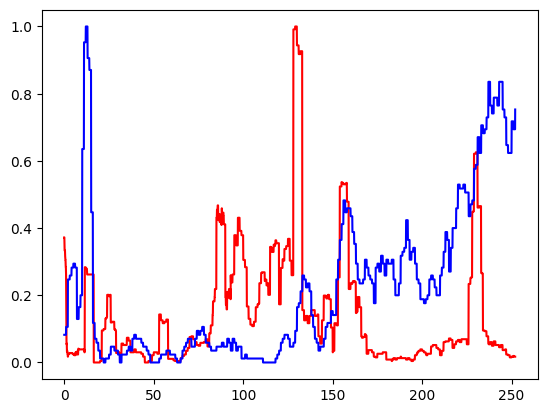

In [30]:
plt.plot(df_filt["Age"], df_filt["ZIR_Count_PDF_Hf"],color='red')
plt.plot(relative_counts_df['Start'], relative_counts_df['Count'], label='Count', color='blue')

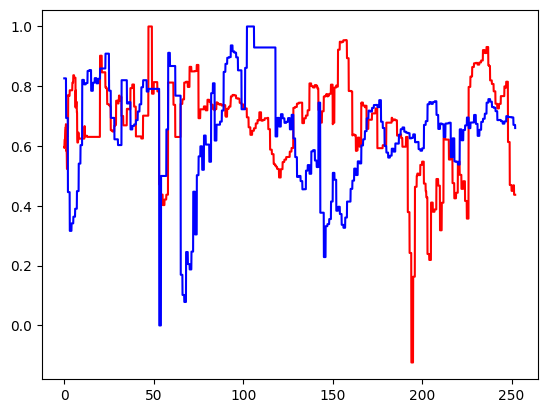

In [31]:
plt.plot(df_filt["Age"], df_filt["ZIR_Interpolated_mean_Hf"],color='red')
plt.plot(relative_counts_df['Start'], relative_counts_df["Mean"], label='Mean', color='blue')

In [ ]:
relative_counts_df = relative_counts_df.iloc[::-1].reset_index(drop=True)
df_filt["ZIR_Count_PDF_Hf"] = relative_counts_df["Count"]
df_filt["ZIR_Interpolated_mean_Hf"] = relative_counts_df["Mean"]

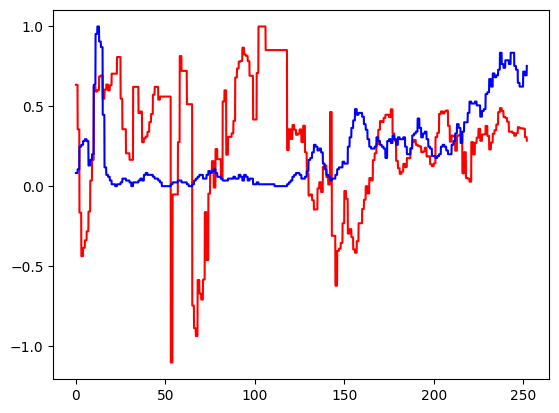

In [14]:
plt.plot(df_filt["Age"], df_filt["ZIR_Interpolated_mean_Hf"],color='red')
plt.plot(df_filt["Age"], df_filt["ZIR_Count_PDF_Hf"],color='blue')

In [16]:
df_filt.to_csv(dataPath + 'filtered_data3.csv', index=False)

In [18]:
test_pd = pd.read_csv(dataPath + 'filtered_data3.csv')
test_pd

,Age,BIO_ExtinctionIntensity (%),BIO_OriginationIntensity(%),BIO_Difference_Cubic,SEA_Modern land sea level (C = 176.6 106km2/km),TEM_GAT,TEM_dT,CO2_pCO2 (ppm),O2_Mid O2%,O2_Range_Normalized,...,SR_Range_Normalized,LIP_LIP_PDF,MAG_INT_mean,MAG_INT_std,MAG_POL_FREQUENCY,MAG_POL_FREQUENCY.3,ZIR_Count_PDF_d18O,ZIR_Interpolated_mean_d18O,ZIR_Count_PDF_Hf,ZIR_Interpolated_mean_Hf
0,252.00,1.000000,0.000000,0.506887,0.263456,0.805210,0.032628,1.000000,1.000000,0.930485,...,0.969434,0.600,0.008044,0.000039,0.090909,0.1000,0.017316,0.437092,0.752941,0.285054
1,251.95,1.000000,0.000000,0.506988,0.263456,0.805657,0.032042,1.000000,0.998872,0.931869,...,0.934624,0.610,0.008299,0.000033,0.095455,0.1020,0.017316,0.437092,0.694118,0.307148
2,251.90,1.000000,0.000000,0.507089,0.263456,0.806103,0.031457,1.000000,0.997744,0.933254,...,0.899814,0.620,0.008553,0.000026,0.100000,0.1040,0.017316,0.437092,0.694118,0.307148
3,251.85,1.000000,0.000000,0.507190,0.263456,0.806549,0.030872,1.000000,0.996615,0.934638,...,0.868058,0.630,0.008828,0.000025,0.104545,0.1060,0.017316,0.437092,0.694118,0.307148
4,251.80,1.000000,0.000000,0.507291,0.263456,0.806995,0.030287,1.000000,0.995487,0.936023,...,0.836303,0.640,0.009102,0.000025,0.109091,0.1080,0.017316,0.437092,0.694118,0.307148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,0.20,0.002184,0.141072,0.912523,0.012354,0.022142,0.963248,0.058102,0.003722,0.152117,...,0.040715,0.016,0.586923,0.117646,0.154545,0.3720,0.333333,0.621146,0.082353,0.634783
5037,0.15,0.002184,0.141072,0.910671,0.012417,0.023525,0.960951,0.058095,0.002792,0.151117,...,0.044493,0.012,0.531968,0.073930,0.150000,0.3715,0.350649,0.610494,0.082353,0.634783
5038,0.10,0.002184,0.141072,0.908819,0.012480,0.024909,0.958654,0.058088,0.001861,0.150116,...,0.048271,0.008,0.477013,0.030214,0.145455,0.3710,0.372294,0.593541,0.082353,0.634783
5039,0.05,0.002184,0.141072,0.906966,0.012543,0.026293,0.956357,0.058081,0.000931,0.149115,...,0.040902,0.004,0.377562,0.030358,0.140909,0.3705,0.372294,0.593541,0.082353,0.634783
